In [119]:
!pip install numpy pandas scikit-learn matplotlib seaborn imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.8 MB/s eta 0:00:00a 0:00:01


### importing packages

In [170]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

##### reading data

In [6]:
raw_data = pd.read_csv('Train.csv')

In [7]:
raw_data.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
1,2,161,158,155,153,151,162,159,155,153,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
2,3,149,151,154,156,158,154,157,158,160,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
3,4,80,78,77,75,73,80,78,77,75,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
4,5,117,115,114,112,110,115,113,111,110,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0


### EDA on Raw data

In [8]:
raw_data.shape

(10864, 227)

In [58]:
raw_data.columns

Index(['Sample_ID', '1_elevation', '2_elevation', '3_elevation', '4_elevation',
       '5_elevation', '6_elevation', '7_elevation', '8_elevation',
       '9_elevation',
       ...
       '17_sdoif', '18_sdoif', '19_sdoif', '20_sdoif', '21_sdoif', '22_sdoif',
       '23_sdoif', '24_sdoif', '25_sdoif', 'Label'],
      dtype='object', length=227)

In [92]:
#datacheck for the lastlo
raw_data.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtyp

In [15]:
# null values check
for value in raw_data.isna().sum().values:
    if value > 0:
        print(value)
else:
    print("no null values")

no null values


In [17]:
# removing duplicates
raw_data.drop_duplicates(keep='first')  
display(raw_data.drop_duplicates())

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
1,2,161,158,155,153,151,162,159,155,153,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
2,3,149,151,154,156,158,154,157,158,160,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
3,4,80,78,77,75,73,80,78,77,75,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
4,5,117,115,114,112,110,115,113,111,110,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,10860,203,202,201,200,199,202,201,201,199,...,1.271912,1.272011,1.272076,1.272174,1.271720,1.271786,1.271884,1.271950,1.272048,0
10860,10861,432,430,427,423,421,431,429,426,422,...,1.331153,1.331137,1.331113,1.331096,1.331207,1.331183,1.331167,1.331142,1.331126,1
10861,10862,348,345,342,339,335,344,342,339,336,...,1.298362,1.298337,1.298321,1.298297,1.298392,1.298376,1.298352,1.298336,1.298311,1
10862,10863,93,91,90,88,86,96,94,93,92,...,1.355035,1.355061,1.355099,1.355125,1.354937,1.354976,1.355002,1.355041,1.355067,0


<AxesSubplot: >

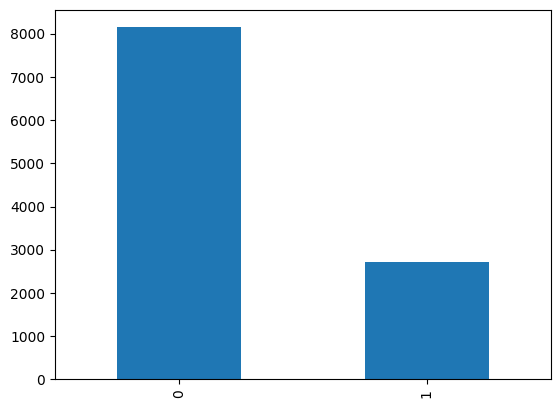

In [81]:
# exploring target class variable
raw_data.Label.value_counts().plot(kind='bar')

> - Class imbalance is there 
    - 80% of the train data are not landslides
    - 20% of the train data are landslides
    - Need for class balancing 
    - probably we should try downsampling, upsampling 
        - centroid base downsampling and kkn based downsampling
        - smote based upsampling, repetions upsampling

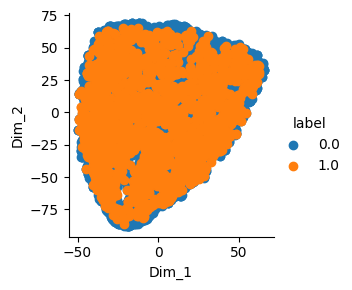

In [32]:
# exploring the possibility of classifying the data with tsne without scaling the data

# save the labels into a variable l.
l = raw_data['Label']

# Drop the label feature and store the data in d.
d = raw_data.drop(columns=["Label","Sample_ID"], axis = 1)

tsne_model = TSNE(n_components = 2, random_state = 0, perplexity = 70, learning_rate= 500)

tsne_data = tsne_model.fit_transform(d)
 
# creating a new data frame which
# help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label").map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

> - Observations on TSNE:
    - TSNE Cannot differentiate the classes 
    - Lot of overlaping of the data points
    - We need standard machine learning to learn the patterns

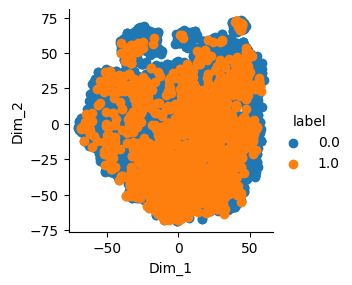

In [38]:
# exploring the possibility of classifying the data with tsne with scaling the data

# save the labels into a variable l.
l = raw_data['Label']

# Drop the label feature and store the pixel data in d.
d = raw_data.drop(columns=["Sample_ID","Label"], axis = 1)

standardized_data = StandardScaler().fit_transform(d)

# TSNE
model = TSNE(n_components = 2, random_state = 0)

tsne_data = model.fit_transform(standardized_data)

# creating a new data frame which
# help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.show()



> - Observations on TSNE with scaling the data:
    - TSNE Cannot differentiate the classes 
    - Lot of overlaping of the data points
    - We need standard machine learning to learn the patterns 

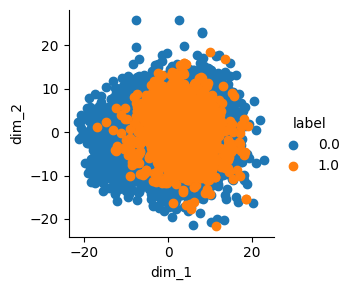

In [78]:
# exploring the possibility of classifying the data with PCA with scaling the data

x_ = raw_data.iloc[:, :-1]
y_= raw_data.iloc[:,-1]

x_ = StandardScaler().fit_transform(x_)

pca = PCA(n_components=2)
raw_transformed_data = pca.fit_transform(x_)


df_temp = pd.DataFrame(np.vstack((raw_transformed_data.T,y_)).T,columns=("dim_1","dim_2","label"))


sn.FacetGrid(df_temp, hue ="label").map(plt.scatter, 'dim_1', 'dim_2').add_legend()
plt.show()



> - Observations on PCA with scaling the data:
    - PCA Cannot differentiate the classes
    - Lot of overlaping of the data points
    - We need standard machine learning to learn the patterns 

#### Statistical tests
    - Test to identify normal distribution - KS test
    - Using p value of 0.05 as a threshold

In [67]:
# removing the columns
columns = raw_data.columns
colns = list(columns)
colns.remove('Sample_ID')
colns.remove('Label')

In [73]:
# code block to pickup the normal distributed features
p_value_threshold = 0.05 
normal_distribution_features = []

for feature_name in colns:
    if stats.kstest(raw_data[feature_name], stats.norm.cdf)[1] > p_value_threshold:
        normal_distribution_features.append(feature_name)

if len(normal_distribution_features) == 0:
    print("None of the features are normally distributed")

None of the features are normally distributed


    - detecting outliers

In [80]:
def detect_outlier(data):
    
    outliers = []
    threshold = 3
    mean_ = np.mean(data)
    std_ = np.std(data)

    for y in data:
        z_score = (y - mean_) / std_
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outlier_dictionary = {}
for feature in colns:
    outliers_ = detect_outlier(raw_data[feature])
    pct = np.round((len(outliers_) / raw_data.shape[0]) * 100,3)
    pct = str(pct) + " %"
    outlier_dictionary[feature] = pct

outlier_dictionary

{'1_elevation': '1.049 %',
 '2_elevation': '1.059 %',
 '3_elevation': '1.068 %',
 '4_elevation': '1.086 %',
 '5_elevation': '1.105 %',
 '6_elevation': '1.04 %',
 '7_elevation': '1.095 %',
 '8_elevation': '1.068 %',
 '9_elevation': '1.086 %',
 '10_elevation': '1.095 %',
 '11_elevation': '1.068 %',
 '12_elevation': '1.049 %',
 '13_elevation': '1.059 %',
 '14_elevation': '1.077 %',
 '15_elevation': '1.095 %',
 '16_elevation': '1.04 %',
 '17_elevation': '1.04 %',
 '18_elevation': '1.049 %',
 '19_elevation': '1.077 %',
 '20_elevation': '1.086 %',
 '21_elevation': '1.049 %',
 '22_elevation': '1.049 %',
 '23_elevation': '1.022 %',
 '24_elevation': '1.077 %',
 '25_elevation': '1.077 %',
 '1_slope': '0.368 %',
 '2_slope': '0.359 %',
 '3_slope': '0.304 %',
 '4_slope': '0.322 %',
 '5_slope': '0.35 %',
 '6_slope': '0.387 %',
 '7_slope': '0.341 %',
 '8_slope': '0.313 %',
 '9_slope': '0.341 %',
 '10_slope': '0.322 %',
 '11_slope': '0.377 %',
 '12_slope': '0.341 %',
 '13_slope': '0.249 %',
 '14_slope

    - checking for co-relations using spearman and pearson techniques
    

<AxesSubplot: >

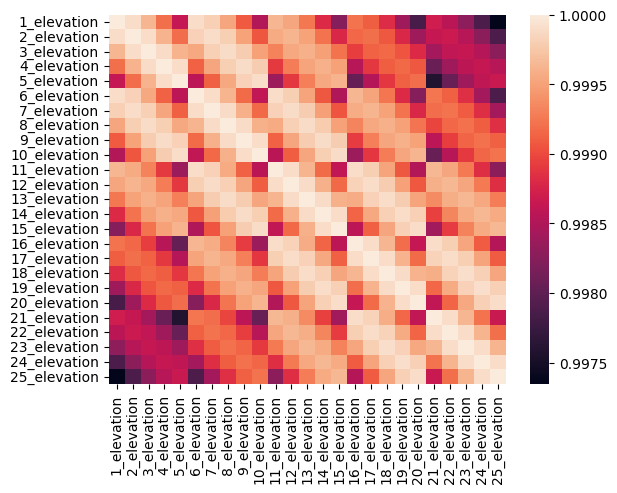

In [106]:
sn.heatmap(raw_data[['1_elevation', '2_elevation', '3_elevation', '4_elevation',
       '5_elevation', '6_elevation', '7_elevation', '8_elevation',
       '9_elevation','10_elevation', '11_elevation', '12_elevation', '13_elevation',
       '14_elevation', '15_elevation', '16_elevation', '17_elevation',
       '18_elevation','19_elevation', '20_elevation', '21_elevation', '22_elevation',
       '23_elevation', '24_elevation', '25_elevation']].corr(method='pearson'))

<AxesSubplot: >

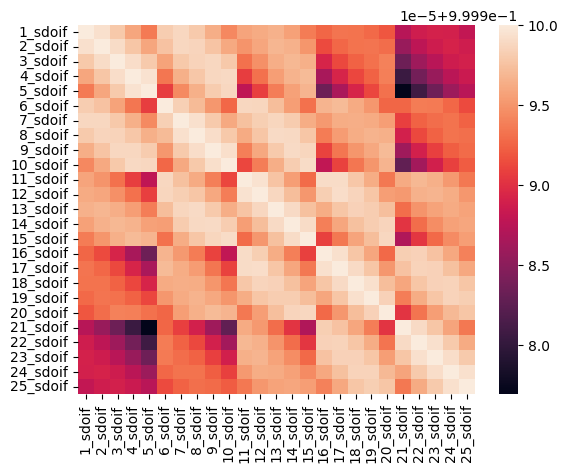

In [107]:
sn.heatmap(raw_data[['1_sdoif', '2_sdoif', '3_sdoif', '4_sdoif', '5_sdoif', '6_sdoif',
       '7_sdoif', '8_sdoif', '9_sdoif','10_sdoif', '11_sdoif', '12_sdoif', '13_sdoif', '14_sdoif', '15_sdoif',
       '16_sdoif', '17_sdoif', '18_sdoif', '19_sdoif', '20_sdoif', '21_sdoif', '22_sdoif',
       '23_sdoif', '24_sdoif', '25_sdoif']].corr(method='pearson'))

<AxesSubplot: >

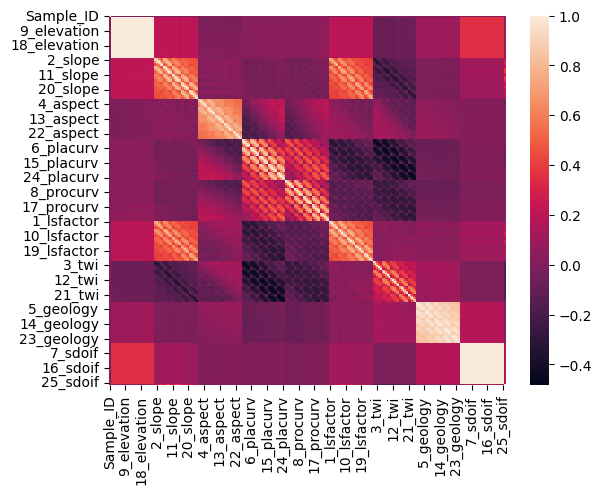

In [108]:
sn.heatmap(raw_data.corr(method='pearson'))

> - Observations from co-relation
     - Most of the features ending with same feature name are highly corelated
     - While the other corelations are not significant 

## NOTE:
- Skipped Partial-Univariate, Bi-variate analysis due to High number of features
- Skipped Data Cleaning as the values are numeric data types
- Skipped Featurization due to SME's knowledge


### Data Prepation for Modelling

- Non-Tree Models
    - Logistic Regression
    - SVM
    - NB
    - KNN
    - SGD technique
    
<br>

- Tree Models
    - Decision tree

<br>

- Ensemble
    - Random Forest
    - XGBoost
    - Stacking
    

    - Data for non-tree models

In [110]:
raw_data.drop(columns=["Sample_ID"], axis=1, inplace=True)

In [112]:
# Storing the labels 
label_non_tree_models = raw_data.Label
label_tree_models = raw_data.Label

In [113]:
# Storing the data 
data_non_tree_models = raw_data.iloc[:,:-1]
data_tree_models = raw_data.iloc[:,:-1]

In [121]:
# Performing Upsampling using SMOTE Technique
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(data_non_tree_models, label_non_tree_models)


<AxesSubplot: >

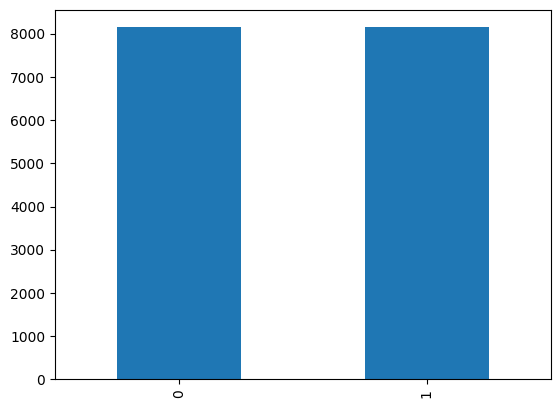

In [126]:
y_res.value_counts().plot(kind='bar')

In [130]:
# Splitting the data into training and cross-validation
X_train, X_cv, y_train, y_cv = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

In [132]:
# deriving the required data for the tree models
final_tree_mdl_X_traindata = X_train
final_tree_mdl_X_cvdata = X_cv
final_tree_mdl_data_y_trainlabels = y_train
final_tree_mdl_data_y_cvlabels = y_cv

In [133]:
# total training data for tree models 
final_total_trainingdata_treemodels = X_res
final_total_trainingdata_labels_treemodels = y_res

In [134]:
# deriving the required data for 
# Scaling the data using standard scaler library 
# Scaling the data for better convergence(optimizing the distance)

non_tree_models_Xtraindata = StandardScaler().fit_transform(X_train)
non_tree_models_Xcvdata = StandardScaler().fit_transform(X_cv)
non_tree_models_y_train = y_train
non_tree_models_y_cv = y_cv

#non_tree_data = StandardScaler().fit_transform(X_res)
#final_total_trainingdata_non_treemodels = non_tree_data
#final_total_trainingdata_labels_non_treemodels = y_res need to run this

In [135]:
## choosing logloss, roc, and confusion metric 

### Picking the hyper parameters for various models

        - non tree models

In [143]:
#logistic cell 
def logistic_regression_tuning(x_train, y_train, x_cv, y_cv):
    """
    This Function is used to tune the logistic regression
    """
    logloss_train = []
    logloss_cv = []
    
    c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100, 1000, 10000, 100000]
    for i in c:
        clf = LogisticRegression(penalty='l2', C=i, max_iter=1000 , class_weight='balanced' ,solver='lbfgs')
        #clf.fit(x_train , y_train)
        
        calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y1 = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logloss_train.append(log_loss(y_train,predict_y1, eps=1e-15))
        logloss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
    plt.plot(np.log(c), logloss_train, label='Train logloss')
    plt.plot(np.log(c), logloss_cv, label='CV logloss')
    plt.scatter(np.log(c), logloss_cv, label='CV logloss')
    plt.legend()
    plt.xlabel("C: hyperparameter")
    plt.ylabel("LogLoss")
    plt.title("ERROR PLOTS")
    
    return(plt.show())

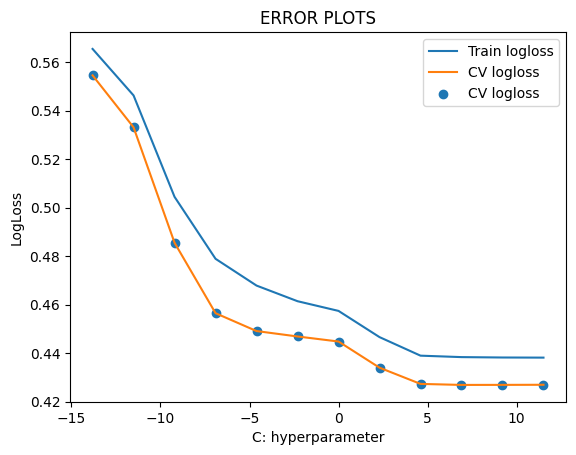

In [144]:
logistic_regression_tuning(non_tree_models_Xtraindata, non_tree_models_y_train, non_tree_models_Xcvdata, non_tree_models_y_cv)

> - Observation from logistic tuning 
    - As per the plot, Picking the best hyper parameter as 1 

In [148]:
#SVM Cell
# Using SVC package
def svm_svc_tuning(x_train, y_train, x_cv, y_cv):
    """
    This function is use to build n test SVM
    """
    logloss_train = []
    logloss_cv = []
    
    hyperparameter=[0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10]
    
    for i in hyperparameter:
        model=SVC(C=i,kernel='rbf',probability=True,class_weight='balanced')
        clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
        clf.fit(x_train,y_train)
        
        pred_ytrain=clf.predict_proba(x_train)
        logloss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))
        
        pred_ycv=clf.predict_proba(x_cv)
        logloss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))
        
    plt.plot(np.log(hyperparameter) , logloss_train)
    plt.plot(np.log(hyperparameter), logloss_cv)
    plt.scatter(np.log(hyperparameter),logloss_cv)
    plt.title("Logloss vs hyper paramenter")
    plt.xlabel("hyperparameter(C)")
    plt.ylabel("Log loss")
    plt.grid()
    return(plt.show())

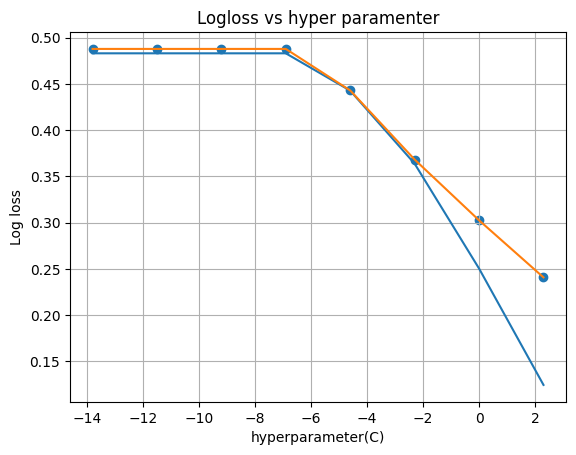

In [149]:
svm_svc_tuning(non_tree_models_Xtraindata, non_tree_models_y_train, non_tree_models_Xcvdata, non_tree_models_y_cv)

> - Observation from svm svc tuning 
    - As per the plot, Picking the best hyper parameter as 0.1 

In [151]:
#SVM Cell
# Using SGD package
def svm_sgd_tuning(x_train, y_train, x_cv, y_cv):
    """
    This function is use to build n hyperparamater tune SGD SVM
    """
    
    logloss_train = [ ]
    logloss_cv = [ ]
    
    c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10]
    for i in c:
        clf_SGD=SGDClassifier(loss='hinge', penalty='l2', alpha=i, class_weight='balanced')

        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y1 = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logloss_train.append(log_loss(y_train,predict_y1, eps=1e-15))
        logloss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
    plt.plot(np.log(c), logloss_train, label='Train logloss')
    plt.plot(np.log(c), logloss_cv, label='CV logloss')

    plt.scatter(np.log(c), logloss_cv, label='CV AUC')
    plt.legend()

    plt.xlabel("C: hyperparameter")
    plt.ylabel("LogLoss")
    plt.title("ERROR PLOTS")
    return(plt.show())

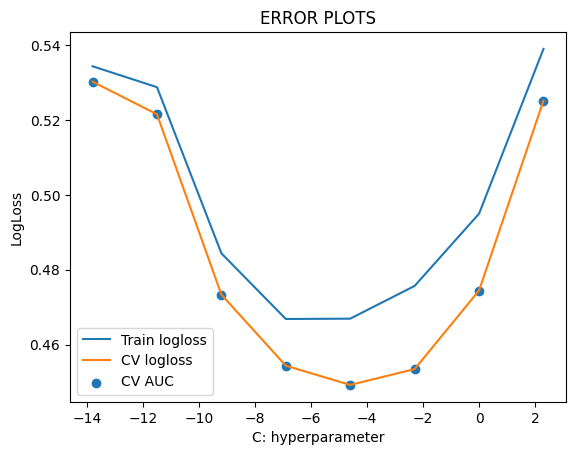

In [152]:
svm_sgd_tuning(non_tree_models_Xtraindata, non_tree_models_y_train, non_tree_models_Xcvdata, non_tree_models_y_cv)

> - Observation from SVM SGD tuning 
    - As per the plot, Picking the best hyper parameter as 0.001 

In [160]:
# naivebayes
def naive_bayes_tunning(x_train, y_train, x_cv, y_cv):
    """
    This function is used to tune naiveBayes Model on data and find right Hyper parameter
    """
    train_logloss = []
    cv_logloss = []
    
    
    Alpha = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000 , 10000 , 100000]
    for i in Alpha:
        MNB = MultinomialNB(alpha=i)
        sig_clf = CalibratedClassifierCV(MNB, method="sigmoid", cv=5)
        sig_clf.fit(x_train,y_train)
        
        y_train_pred =  sig_clf.predict_proba(x_train)
        y_cv_pred =  sig_clf.predict_proba(x_cv)
        
        train_logloss.append(log_loss(y_train,y_train_pred,eps=1e-15))
        cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
    
    plt.plot(np.log(Alpha), train_logloss, label='Train Logloss')
    plt.plot(np.log(Alpha), cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(np.log(Alpha),cv_logloss , label='CV logloss')
    plt.xlabel("log(alpha)")
    plt.ylabel("logloss")
    plt.title("ERROR PLOTS")
    return(plt.show())



In [169]:
naive_bayes_tunning(final_tree_mdl_X_traindata, final_tree_mdl_data_y_trainlabels, final_tree_mdl_X_cvdata, final_tree_mdl_data_y_cvlabels)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [164]:
#knn cell
def knn_tuning(x_train, y_train, x_cv, y_cv):
    """
    This Function is used to perform KNNtuning and decide the K hyper parameter
    """
    train_logloss = []
    cv_logloss = []
  
    K = [1, 5, 11, 15, 21, 31, 41, 51 , 61 ,81]
    for i in K:
        neigh = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
        
        sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
        sig_clf.fit(x_train,y_train)
        
        y_train_pred =  sig_clf.predict_proba(x_train)
        y_cv_pred =  sig_clf.predict_proba(x_cv)
        
        train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
        cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
        
    plt.plot(K, train_logloss, label='Train Logloss')
    plt.plot(K, cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(K,cv_logloss , label='CV logloss')
    plt.xlabel("K")
    plt.ylabel("logloss")
    plt.title("ERROR PLOTS")
    return(plt.show())



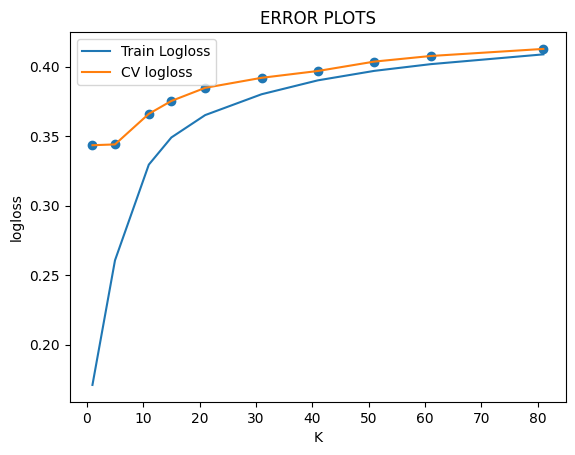

In [168]:
knn_tuning(non_tree_models_Xtraindata, non_tree_models_y_train, non_tree_models_Xcvdata, non_tree_models_y_cv)

> - Observation from KNN tuning 
    - As per the plot, Picking the best hyper parameter as 31

    - Treemodels

In [ ]:
# decision tree
def decission_tuning(x_train, y_train, x_cv, y_cv):
    """
    This Function is used to perform decission tree tuning and decide the hyper parameter
    """
    train_logloss = []
    cv_logloss = []
  
    for i in K:
        clf = DecisionTreeClassifier(random_state = 42)
        sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
        sig_clf.fit(x_train,y_train)
        
        y_train_pred =  sig_clf.predict_proba(x_train)
        y_cv_pred =  sig_clf.predict_proba(x_cv)
        
        train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
        cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
        
    plt.plot(K, train_logloss, label='Train Logloss')
    plt.plot(K, cv_logloss ,label='CV logloss')
    plt.legend()
    plt.scatter(K,cv_logloss , label='CV logloss')
    plt.xlabel("K")
    plt.ylabel("logloss")
    plt.title("ERROR PLOTS")
    return(plt.show())

